#CDIA:::AAI - Hill Climbing Algorithm -- Travelling Salesman Problem

Ibai Laña

In this notebook we will encode TSP problem and try to solve it with HIll Climbing Algorithm.



## PROBLEM FORMULATION
The problem was formulated as a Python class, with the actions, restrictions and functions integrated and always the same name, so they can be re-coded for different problems and the search methods work the same. We start creating the class for TSP problem. 

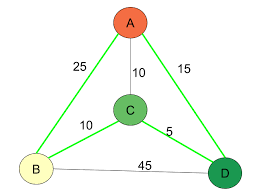

In [ ]:
a = [1,2,3,4]
a[2]=4
a

[1, 2, 4, 4]

In [ ]:
import numpy as np
class TSP (): 
    #attributes of the class are empty
    name = ""
    initial_state = {}
    actions = []
    number_of_cities = 0
    successors = []
    distance_matrix = [[  0., 804., 288., 707.],
                        [804.,   0., 945., 856.],
                        [288., 945.,   0., 995.],
                        [707., 856., 995.,   0.]]


    def __init__(self): ## init method is the constructor. 
        self.name ="TSP"
        self.number_of_cities = 100
        
        # to formulate the problem we will state that there will be a set of 
        # n queens in n columns. Each queen will be placed in a column, so we
        # only need to state which row they are in, in an 8-sized array
        random_init =list(np.arange(self.number_of_cities))
        np.random.shuffle(random_init)
        self.initial_state = random_init
        self.distance_matrix = self.initialize_distance_matrix()
        
    def initialize_distance_matrix(self):
      mat = np.zeros((self.number_of_cities, self.number_of_cities))
      for i in range(self.number_of_cities):
        for j in range(self.number_of_cities):
          if i!=j:
            if mat[i,j]==0:
              mat[i,j]= np.random.randint(10, 1000)
              mat[j,i] = mat[i,j]
      return mat



    def draw(self, state):
      text = ""
      for i in range(self.number_of_cities-1):
        text+="|"+str(state[i])+"|--"+str( self.distance_matrix [state[i]][state[i+1]])+"--"
      text+="|"+str(state[0])+"| ::::: "+str(self.get_evaluation(state))  
      print (text)

    def get_successors(self, state):
      successors = []
      for i in range( self.number_of_cities-1):
        new_successor = state.copy()
        new_successor[i], new_successor[i+1] = new_successor[i+1], new_successor[i]
        successors.append(new_successor)
      return successors

      pass
    def get_cost(self, action, state):
        # in this case the cost is constant, every action is the same, but this can change depending on the problem
        return 1

    # h(n) =  number of queens attacked     
    def get_evaluation (self, state):
      total_distance=0
      for i in range(self.number_of_cities-1):
        total_distance+=self.distance_matrix [state[i]][state[i+1]]
      total_distance+=self.distance_matrix[state[-1]][state[0]]#add the connection from last city to first
      
      return total_distance


In [ ]:
tsp = TSP()
print (tsp.initial_state)
print (tsp.distance_matrix)

print (tsp.get_evaluation(tsp.initial_state))
print (tsp.get_successors(tsp.initial_state))


# for s in tsp.get_successors(tsp.initial_state):
#   print (tsp.get_evaluation(s))


[71, 6, 98, 89, 51, 16, 78, 15, 4, 87, 39, 5, 43, 96, 46, 65, 91, 26, 48, 52, 63, 31, 83, 33, 64, 28, 95, 7, 41, 54, 90, 68, 57, 60, 11, 3, 56, 8, 81, 0, 22, 55, 37, 17, 18, 94, 99, 53, 36, 97, 23, 82, 19, 45, 73, 88, 92, 72, 75, 2, 13, 74, 77, 49, 69, 86, 12, 25, 24, 27, 50, 85, 61, 76, 9, 58, 34, 47, 1, 20, 10, 44, 42, 79, 59, 80, 67, 70, 30, 21, 29, 62, 14, 84, 35, 40, 38, 32, 66, 93]
[[  0. 466. 861. ... 913. 325. 696.]
 [466.   0. 986. ... 278. 287. 463.]
 [861. 986.   0. ... 654. 761. 692.]
 ...
 [913. 278. 654. ...   0. 781. 458.]
 [325. 287. 761. ... 781.   0. 920.]
 [696. 463. 692. ... 458. 920.   0.]]
49523.0
[[6, 71, 98, 89, 51, 16, 78, 15, 4, 87, 39, 5, 43, 96, 46, 65, 91, 26, 48, 52, 63, 31, 83, 33, 64, 28, 95, 7, 41, 54, 90, 68, 57, 60, 11, 3, 56, 8, 81, 0, 22, 55, 37, 17, 18, 94, 99, 53, 36, 97, 23, 82, 19, 45, 73, 88, 92, 72, 75, 2, 13, 74, 77, 49, 69, 86, 12, 25, 24, 27, 50, 85, 61, 76, 9, 58, 34, 47, 1, 20, 10, 44, 42, 79, 59, 80, 67, 70, 30, 21, 29, 62, 14, 84, 35, 4

# Expansion Function



In [ ]:
# instead of updating the frontier, the expand function only creates a list of child of possible nodes given a current node
# it does not receive states, but NODES, dictionaries that include other information besides state
def expand (node, problem):
    successors = problem.get_successors(node["state"])
    #1.
    best_successor = successors[0]
    2.  
    for successor in successors:
      2.1
      if problem.get_evaluation(successor)<problem.get_evaluation(best_successor):
        best_successor=successor
    
    new_node = {}
    new_node["state"]=best_successor
    new_node["parent_node"]=node
    # we dont store the list of actions, cost or depth
    # new_node["actions"]=node["actions"] + [action]
    # new_node["cost"]=node["cost"] + problem.get_cost(action, node["state"])
    # new_node["depth"]=node["depth"]+1
    new_node["evaluation"]=problem.get_evaluation(best_successor)
    # we only return a node, the next to be explored
    return new_node
    

# HILL CLIMBING METHOD


In [ ]:
def HillClimbing(problem):
  #1.
  initial_node = {}
  initial_node["state"]=problem.initial_state
  initial_node["parent_node"]=None
  initial_node["evaluation"]=problem.get_evaluation(problem.initial_state) 
  
  #2.
  current_node =initial_node
  
  
  local_best_found = False

  iteration = 1
  #3.
  while not local_best_found:
    
    ## just prints
    print ("***************************************")
    print ("ITERATION: ", iteration)
    problem.draw(current_node["state"])
    print ("Heuristic of the current node: ", problem.get_evaluation(current_node["state"]))
    ##
    
    # 3.1.
    best_successor = expand(current_node, problem)
      # if current is better than the best one, we are at a local minimum
    #3.2
    if problem.get_evaluation(current_node["state"])<= problem.get_evaluation(best_successor["state"]):
      local_best_found=True
      print ("Local minimum found, best_successor heuristic is : ", problem.get_evaluation(best_successor["state"]))
      print ("BEst node with evaluation h(n)=", problem.get_evaluation(current_node["state"]))
      problem.draw(current_node["state"])
    #3.3.
    else:
      current_node = best_successor



    
    iteration+=1
  return current_node





In [ ]:
tsp = TSP()
print (tsp.initial_state)
print (tsp.distance_matrix)

print (tsp.get_evaluation(tsp.initial_state))
print (tsp.get_successors(tsp.initial_state))

solution  = HillClimbing(tsp)



[91, 47, 50, 36, 88, 4, 55, 60, 82, 0, 67, 86, 96, 24, 51, 11, 94, 54, 56, 22, 25, 83, 40, 5, 48, 93, 43, 64, 44, 35, 59, 31, 92, 18, 81, 62, 70, 14, 16, 84, 32, 68, 73, 75, 12, 33, 38, 57, 74, 37, 76, 3, 69, 28, 79, 52, 34, 65, 95, 58, 13, 97, 20, 29, 42, 46, 49, 19, 66, 15, 85, 80, 72, 61, 77, 71, 39, 90, 41, 45, 98, 6, 17, 99, 63, 87, 89, 53, 21, 7, 26, 23, 8, 10, 27, 1, 2, 30, 9, 78]
[[  0. 161. 436. ... 453. 556. 970.]
 [161.   0.  43. ... 473. 489. 847.]
 [436.  43.   0. ... 949. 776. 790.]
 ...
 [453. 473. 949. ...   0. 169. 319.]
 [556. 489. 776. ... 169.   0. 116.]
 [970. 847. 790. ... 319. 116.   0.]]
51158.0
[[47, 91, 50, 36, 88, 4, 55, 60, 82, 0, 67, 86, 96, 24, 51, 11, 94, 54, 56, 22, 25, 83, 40, 5, 48, 93, 43, 64, 44, 35, 59, 31, 92, 18, 81, 62, 70, 14, 16, 84, 32, 68, 73, 75, 12, 33, 38, 57, 74, 37, 76, 3, 69, 28, 79, 52, 34, 65, 95, 58, 13, 97, 20, 29, 42, 46, 49, 19, 66, 15, 85, 80, 72, 61, 77, 71, 39, 90, 41, 45, 98, 6, 17, 99, 63, 87, 89, 53, 21, 7, 26, 23, 8, 10, 27